In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

data_path = '/kaggle/input/titanic/'

train = pd.read_csv(os.path.join(data_path, 'train.csv'))

In [2]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test = pd.read_csv(os.path.join(data_path, 'test.csv'))

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* passengerId 필요없어 보임
* survived, pclass 사용
* name 관련이 있다. Mr. Mrs.가 붙은 사람
* sex, age 관련있음
* sibsp 솔직히 잘 모르겠다.
* parch 얘도 좀
* ticket 삭제
* fare 삭제
* cabin 중요해 보임 근데 null 값들은 대체 뭐지?
* embarked 승선 항구는 별로 안중요해보임

* ['PassengerId', 'Ticket', 'Fare', 'Embarked'] 는 일단 삭제


In [7]:
submit = pd.read_csv(os.path.join(data_path, 'gender_submission.csv'))

In [8]:
print(test.shape, submit.shape)

(418, 11) (418, 2)


In [10]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [12]:
train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [21]:
train[train['Cabin'].isna()]['Pclass'].value_counts()

3    479
2    168
1     40
Name: Pclass, dtype: int64

In [22]:
new_age = []
for row in train[:10].iterrows():
    if row['Age'] <= 32:
        new_age.append(1)
    elif 32 < row['Age'] <=48:
        new_age.append(2)
    elif 

(0, PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                               22.0
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object)
(1, PassengerId                                                    2
Survived                                                       1
Pclass                                                         1
Name           Cumings, Mrs. John Bradley (Florence Briggs Th...
Sex                                                       female
Age                                                         38.0
SibSp                                                          1
Parch                                        

In [23]:
train = train.drop(['Ticket', 'Cabin'], axis=1)
test = test.drop(['Ticket', 'Cabin'], axis=1)
combine=[train,test]

In [26]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [27]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

In [29]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [31]:
train = train.drop(['Name', 'PassengerId'], axis=1)
test = test.drop(['Name'], axis=1)
combine = [train, test]
train.shape, test.shape

((891, 9), (418, 9))

In [32]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


In [34]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
combine = [train, test]
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,0.0,1,0,7.2500,S,1
1,1,1,1,0.0,1,0,71.2833,C,3
2,1,3,1,0.0,0,0,7.9250,S,2
3,1,1,1,0.0,1,0,53.1000,S,3
4,0,3,0,0.0,0,0,8.0500,S,1


In [35]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

In [39]:
freq_port = train.Embarked.dropna().mode()[0]
freq_port

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

In [40]:
train.shape

(891, 10)

In [61]:
coef_dict = {'Pclass' : [0.6, 0.5, 0.2],
             'Sex' : [0.2, 0.7],
             'Age' : [0.6, 0.3, 0.4, 0.4, 0.9],
             'FamilySize': [0.3, 0.6, 0.5, 0.7, 0.2, 0.1],
             'Title': [0.2, 0.7, 0.8, 0.5, 0.3],
             'Embarked': [0.3, 0.6, 0.4]
            }

In [42]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,0,3,0,0.0,1,0,7.2500,S,1,2
1,1,1,1,0.0,1,0,71.2833,C,3,2
2,1,3,1,0.0,0,0,7.9250,S,2,1
3,1,1,1,0.0,1,0,53.1000,S,3,2
4,0,3,0,0.0,0,0,8.0500,S,1,1


In [43]:
train['Title'].unique()

array([1, 3, 2, 4, 5])

In [58]:
for idx ,row in train[:10].iterrows():
    print(row['Pclass'])

3
1
3
1
3
3
1
3
3
2


In [65]:
coef_1 = []
for idx, row in train.iterrows():
    tmp = 0
    if row['Pclass'] == 1:
        tmp += coef_dict['Pclass'][0]
    elif row['Pclass'] == 2:
        tmp += coef_dict['Pclass'][1]
    elif row['Pclass'] == 3:
        tmp += coef_dict['Pclass'][0]
    
    if row['Sex'] == 0:
        tmp += coef_dict['Sex'][0]
    elif row['Sex'] == 1:
        tmp += coef_dict['Sex'][1]
        
    if row['Age'] <= 16:
        tmp += coef_dict['Age'][0]
    elif 16 < row['Age'] <= 32:
        tmp += coef_dict['Age'][1]
    elif 32 < row['Age'] <= 48:
        tmp += coef_dict['Age'][2]
    elif 48 < row['Age'] <= 64:
        tmp += coef_dict['Age'][3]
    else:
        tmp += coef_dict['Age'][4]
        
    if row['FamilySize'] == 1:
        tmp += coef_dict['FamilySize'][0]
    elif row['FamilySize'] == 2:
        tmp += coef_dict['FamilySize'][1]
    elif row['FamilySize'] == 3:
        tmp += coef_dict['FamilySize'][2]
    elif row['FamilySize'] == 4:
        tmp += coef_dict['FamilySize'][3]
    elif row['FamilySize'] == 5:
        tmp += coef_dict['FamilySize'][4]
    elif row['FamilySize'] == 6:
        tmp += coef_dict['FamilySize'][5]
        
    if row['Title'] == 1:
        tmp += coef_dict['Title'][0]
    elif row['Title'] == 2:
        tmp += coef_dict['Title'][1]
    elif row['Title'] == 3:
        tmp += coef_dict['Title'][2]
    elif row['Title'] == 4:
        tmp += coef_dict['Title'][3]
    elif row['Title'] == 5:
        tmp += coef_dict['Title'][4]
    
    if row['Embarked'] == 'S':
        tmp += coef_dict['Embarked'][0]
    elif row['Embarked'] == 'C':
        tmp += coef_dict['Embarked'][1]
    elif row['Embarked'] == 'S':
        tmp += coef_dict['Embarked'][2]
        
    coef_1.append(tmp)
    
print(len(coef_1))

891


In [66]:
train['coef_1'] = coef_1

In [67]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,coef_1
0,0,3,0,0.0,1,0,7.2500,S,1,2,2.5
1,1,1,1,0.0,1,0,71.2833,C,3,2,3.9
2,1,3,1,0.0,0,0,7.9250,S,2,1,3.2
3,1,1,1,0.0,1,0,53.1000,S,3,2,3.6
4,0,3,0,0.0,0,0,8.0500,S,1,1,2.2


<AxesSubplot:xlabel='coef_1', ylabel='Count'>

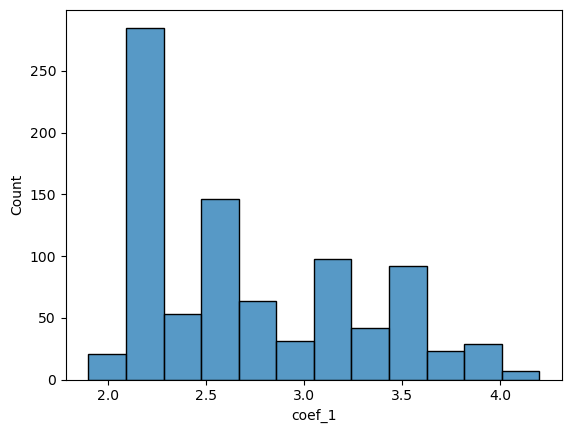

In [69]:
sns.histplot(x=train['coef_1'])

In [70]:
train[['coef_1', 'Survived']].groupby(['coef_1'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,coef_1,Survived
26,3.1,1.000000
15,2.7,1.000000
44,4.0,1.000000
40,3.8,1.000000
29,3.3,1.000000
30,3.3,1.000000
9,2.4,1.000000
37,3.6,1.000000
32,3.4,1.000000
17,2.8,1.000000


In [71]:
coef_1 = []
for idx, row in test.iterrows():
    tmp = 0
    if row['Pclass'] == 1:
        tmp += coef_dict['Pclass'][0]
    elif row['Pclass'] == 2:
        tmp += coef_dict['Pclass'][1]
    elif row['Pclass'] == 3:
        tmp += coef_dict['Pclass'][0]
    
    if row['Sex'] == 0:
        tmp += coef_dict['Sex'][0]
    elif row['Sex'] == 1:
        tmp += coef_dict['Sex'][1]
        
    if row['Age'] <= 16:
        tmp += coef_dict['Age'][0]
    elif 16 < row['Age'] <= 32:
        tmp += coef_dict['Age'][1]
    elif 32 < row['Age'] <= 48:
        tmp += coef_dict['Age'][2]
    elif 48 < row['Age'] <= 64:
        tmp += coef_dict['Age'][3]
    else:
        tmp += coef_dict['Age'][4]
        
    if row['FamilySize'] == 1:
        tmp += coef_dict['FamilySize'][0]
    elif row['FamilySize'] == 2:
        tmp += coef_dict['FamilySize'][1]
    elif row['FamilySize'] == 3:
        tmp += coef_dict['FamilySize'][2]
    elif row['FamilySize'] == 4:
        tmp += coef_dict['FamilySize'][3]
    elif row['FamilySize'] == 5:
        tmp += coef_dict['FamilySize'][4]
    elif row['FamilySize'] == 6:
        tmp += coef_dict['FamilySize'][5]
        
    if row['Title'] == 1:
        tmp += coef_dict['Title'][0]
    elif row['Title'] == 2:
        tmp += coef_dict['Title'][1]
    elif row['Title'] == 3:
        tmp += coef_dict['Title'][2]
    elif row['Title'] == 4:
        tmp += coef_dict['Title'][3]
    elif row['Title'] == 5:
        tmp += coef_dict['Title'][4]
    
    if row['Embarked'] == 'S':
        tmp += coef_dict['Embarked'][0]
    elif row['Embarked'] == 'C':
        tmp += coef_dict['Embarked'][1]
    elif row['Embarked'] == 'S':
        tmp += coef_dict['Embarked'][2]
        
    coef_1.append(tmp)
    
print(len(coef_1))

418


In [73]:
test['coef_1'] = coef_1

In [74]:
result = []
for idx, row in test.iterrows():
    if row['coef_1'] > 2.7:
        result.append(1)
    else:
        result.append(0)


In [75]:
submit['Survived'] = result

In [ ]:
submit.to_csv('submission.csv', index=False')